# Original Files Processing `qualar`

The files resulting from downloading the data from the QualAr website (https://qualar.apambiente.pt) are organized as shown in the figure below.
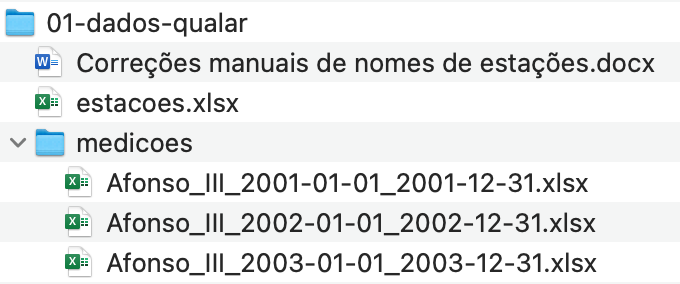

The Word file is not required and only indicates the manual corrections that were necessary, since some pollutant monitoring stations changed their names over time.

The file estacoes.xlsx contains one row per station with the following information: Station, Region, Municipality, Station Type, Area Type, Latitude, Longitude, and Altitude.

The measurement files are provided in Excel format, with one file per year and per station.
Each file contains a single worksheet whose first row includes:
. Station name (with the date and time of the reading below it)
. Sulfur Dioxide (µg/m3)
. Particulate Matter < 10 µm (µg/m3)
. Ozone (µg/m3)
. Nitrogen Dioxide (µg/m3)
. Carbon Monoxide (mg/m3)
. Benzene (µg/m3)
. Particulate Matter < 2.5 µm (µg/m³)

Since each file corresponds to hourly readings over one year, there are 24 × 365 = 8,760 rows (in non-leap years). 

The objective of this processing stage is to read all the files into a single dataframe and write it, in CSV format, to a directory named “02-dados-qualar-integrados”, with the file name “02-medicoes-um-ficheiro”.


## Initialization

In [ ]:
import os as mac
import pandas as pd

In [ ]:
# Function that reads a file, extract the station name, adds it as a column, and return the respective Dataframe
def read_file(file_path):
    df = pd.read_excel(file_path)
    nome_estacao = df.columns.values[0]
    df.rename(columns={nome_estacao:'data'},inplace=True)
    df.insert(1,'Estação', nome_estacao)
    return df

In [ ]:
# Data directory
dir_original_files = './01-dados-qualar/medicoes'

# Destination directory
dir_destination = './02-dados-qualar-integrados/'

## Processing

In [ ]:
# List to store all the dataframes
dfs = []

# Process every file from the data given
for file in mac.listdir(dir_original_files):
    df = read_file(dir_original_files + '/' + file)
    dfs.append(df)
# Concat every df into one
df_estacoes = None
for df in dfs:
        df_estacoes = pd.concat([df_estacoes,df])
# Check the result
df_estacoes

## Output

In [ ]:
# Store the final Dataframe
df_estacoes.to_csv(dir_destination + 'df_estacoes.csv', index = False)